In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pddr
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime,date
yf.pdr_override()

In [81]:
startdate= '2012-10-24'
enddate= '2023-02-02'


df = yf.download('AAPL', start= startdate, end= enddate)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-10-24 00:00:00-04:00,22.194286,22.376785,21.808571,22.029642,18.859083,558527200
2012-10-25 00:00:00-04:00,22.142857,22.214287,21.626785,21.769285,18.636200,656325600
2012-10-26 00:00:00-04:00,21.765356,21.928572,21.107143,21.571428,18.466820,1018432800
2012-10-31 00:00:00-04:00,21.245714,21.498571,20.989286,21.261429,18.201435,510003200
2012-11-01 00:00:00-04:00,21.365000,21.535713,21.220358,21.305000,18.238739,361298000


In [82]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-26 00:00:00-05:00,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
2023-01-27 00:00:00-05:00,143.160004,147.229996,143.080002,145.929993,145.929993,70492800
2023-01-30 00:00:00-05:00,144.960007,145.550003,142.850006,143.000000,143.000000,64015300
2023-01-31 00:00:00-05:00,142.699997,144.339996,142.279999,144.289993,144.289993,65874500
2023-02-01 00:00:00-05:00,143.970001,146.610001,141.320007,145.429993,145.429993,77663600


In [83]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-10-24 00:00:00-04:00,22.194286,22.376785,21.808571,22.029642,18.859083,558527200
1,2012-10-25 00:00:00-04:00,22.142857,22.214287,21.626785,21.769285,18.636200,656325600
2,2012-10-26 00:00:00-04:00,21.765356,21.928572,21.107143,21.571428,18.466820,1018432800
3,2012-10-31 00:00:00-04:00,21.245714,21.498571,20.989286,21.261429,18.201435,510003200
4,2012-11-01 00:00:00-04:00,21.365000,21.535713,21.220358,21.305000,18.238739,361298000


In [84]:
df= df.drop(['Date', 'Adj Close'], axis= 1)
df.head()

,Open,High,Low,Close,Volume
0,22.194286,22.376785,21.808571,22.029642,558527200
1,22.142857,22.214287,21.626785,21.769285,656325600
2,21.765356,21.928572,21.107143,21.571428,1018432800
3,21.245714,21.498571,20.989286,21.261429,510003200
4,21.365000,21.535713,21.220358,21.305000,361298000


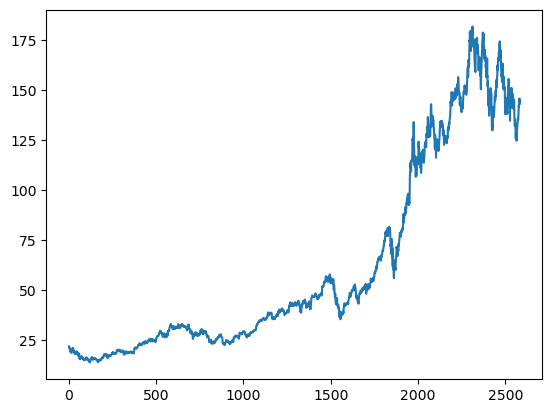

In [85]:
plt.plot(df.Close)

In [86]:
df

,Open,High,Low,Close,Volume
0,22.194286,22.376785,21.808571,22.029642,558527200
1,22.142857,22.214287,21.626785,21.769285,656325600
2,21.765356,21.928572,21.107143,21.571428,1018432800
3,21.245714,21.498571,20.989286,21.261429,510003200
4,21.365000,21.535713,21.220358,21.305000,361298000
...,...,...,...,...,...
2579,143.169998,144.250000,141.899994,143.960007,54105100
2580,143.160004,147.229996,143.080002,145.929993,70492800
2581,144.960007,145.550003,142.850006,143.000000,64015300
2582,142.699997,144.339996,142.279999,144.289993,65874500


In [87]:
ma100= df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2579    143.408599
2580    143.309799
2581    143.194499
2582    143.077799
2583    142.987499
Name: Close, Length: 2584, dtype: float64

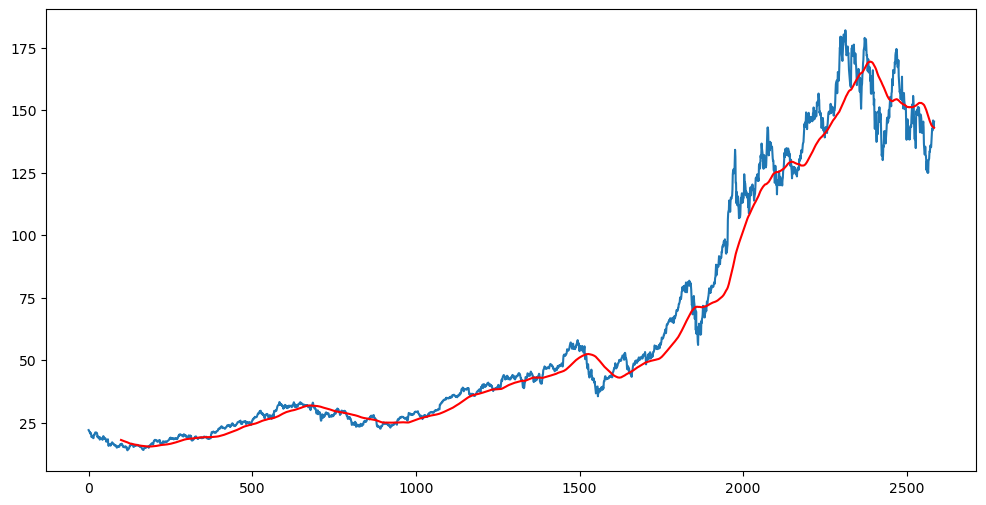

In [88]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [89]:
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2579    148.38975
2580    148.29065
2581    148.16735
2582    148.03680
2583    147.93750
Name: Close, Length: 2584, dtype: float64

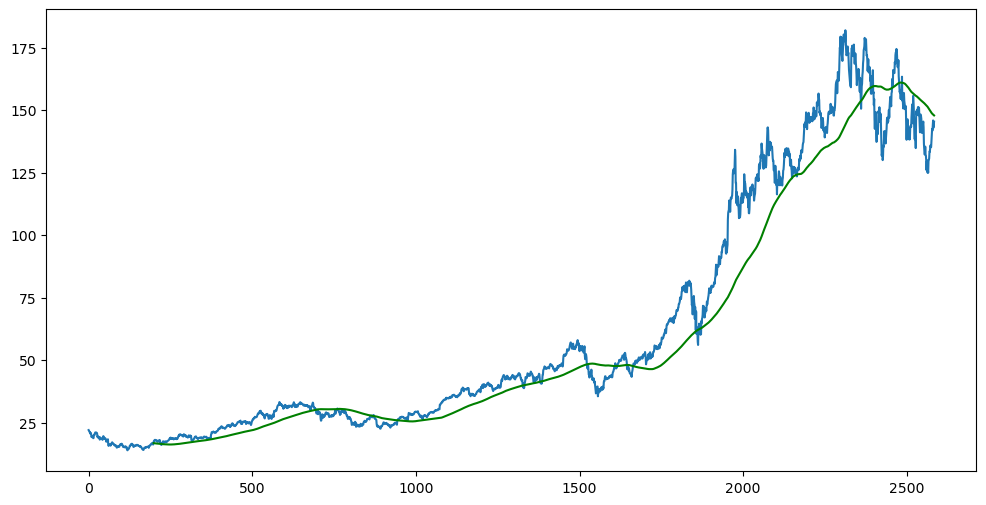

In [90]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma200, 'g')

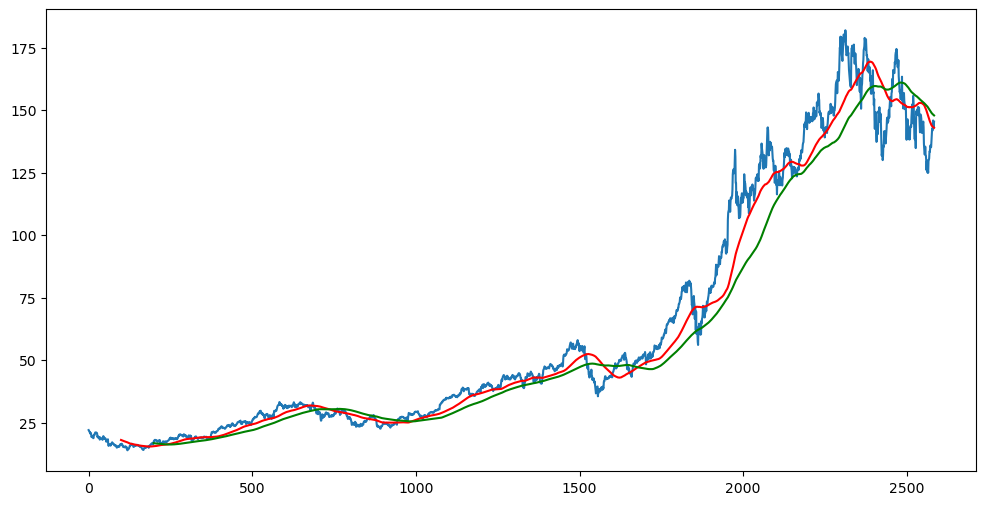

In [91]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [92]:
df.shape

(2584, 5)

In [93]:
# Training & Testing Dataset

data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1808, 1)
(776, 1)


In [94]:
data_training.head()

,Close
0,22.029642
1,21.769285
2,21.571428
3,21.261429
4,21.305000


In [95]:
data_testing.head()

,Close
1808,74.357498
1809,74.949997
1810,74.597504
1811,75.797501
1812,77.407501


In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range= (0,1))

In [97]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.13219074],
       [0.12793237],
       [0.12469624],
       ...,
       [0.96389427],
       [0.97260381],
       [1.        ]])

In [98]:
data_training_array.shape

(1808, 1)

In [99]:
x_train= []
y_train= []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train= np.array(x_train), np.array(y_train)

In [100]:
# MLModeL

In [101]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [102]:
x_train.shape

(1708, 100, 1)

In [103]:
model= Sequential()
model.add(LSTM(units= 50, activation= 'relu', return_sequences= True,
              input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units= 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))



model.add(LSTM(units= 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))



model.add(LSTM(units= 120, activation= 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units= 1))

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [105]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
54/54 [==============================] - 55s 430ms/step - loss: 0.0295
Epoch 2/50
54/54 [==============================] - 23s 424ms/step - loss: 0.0066
Epoch 3/50
54/54 [==============================] - 24s 440ms/step - loss: 0.0051
Epoch 4/50
54/54 [==============================] - 20s 377ms/step - loss: 0.0046
Epoch 5/50
54/54 [==============================] - 20s 379ms/step - loss: 0.0053
Epoch 6/50
54/54 [==============================] - 19s 358ms/step - loss: 0.0045
Epoch 7/50
54/54 [==============================] - 19s 356ms/step - loss: 0.0048
Epoch 8/50
54/54 [==============================] - 19s 358ms/step - loss: 0.0037
Epoch 9/50
54/54 [==============================] - 21s 386ms/step - loss: 0.0036
Epoch 10/50
54/54 [==============================] - 20s 375ms/step - loss: 0.0032
Epoch 11/50
54/54 [==============================] - 21s 385ms/step - loss: 0.0034
Epoch 12/50
54/54 [==============================] - 19s 361ms/step - loss: 0.0036
Epoch 13/50
5

In [122]:
model.save('keras_model2.h5')

In [123]:
data_testing.head()

,Close
1808,74.357498
1809,74.949997
1810,74.597504
1811,75.797501
1812,77.407501


In [124]:
past_100_days= data_training.tail(100)

In [125]:
final_df= past_100_days.append(data_testing, ignore_index= True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15824\2699728040.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df= past_100_days.append(data_testing, ignore_index= True)


In [126]:
final_df.head()

,Close
0,50.119999
1,52.242500
2,50.687500
3,50.435001
4,51.625000


In [127]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.01609297],
       [0.00430284],
       [0.00238837],
       [0.01141103],
       [0.01870879],
       [0.01872774],
       [0.02304952],
       [0.02270834],
       [0.00409433],
       [0.01139209],
       [0.00697553],
       [0.00957238],
       [0.01616878],
       [0.01565701],
       [0.00989461],
       [0.01650998],
       [0.02426265],
       [0.02422473],
       [0.02594966],
       [0.03074532],
       [0.04380545],
       [0.04285769],
       [0.03463114],
       [0.03681098],
       [0.0383274 ],
       [0.04225114],
       [0.03882025],
       [0.0326977 ],
       [0.03457428],
       [0.03260292],
       [0.03895292],
       [0.03679203],
       [0.03476384],
       [0.04452575],
       [0.04570097],
       [0.03502921],
       [0.03855488],
       [0.05028812],
       [0.0503829 ],
       [0.04534081],
       [0.05032604],
       [0.05612632],
       [0.06772692],
       [0.06708242],
       [0.06603991],
       [0.06423914],
       [0.065

In [128]:
input_data.shape

(876, 1)

In [129]:
x_test= []
y_test= []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [130]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(776, 100, 1)
(776,)


In [131]:
#Predictions

y_predicted= model.predict(x_test)

25/25 [==============================] - 3s 126ms/step


In [132]:
y_predicted.shape

(776, 1)

In [133]:
y_test

array([0.18377057, 0.18826294, 0.18559031, 0.19468878, 0.20689592,
       0.20822275, 0.22079005, 0.21267723, 0.21013724, 0.21752976,
       0.22414516, 0.22005083, 0.22219278, 0.22509292, 0.22334901,
       0.20560698, 0.2221738 , 0.23477899, 0.2338881 , 0.20666847,
       0.20505727, 0.22437261, 0.22930097, 0.23642808, 0.22660931,
       0.22949048, 0.22581317, 0.24020021, 0.23578361, 0.23593529,
       0.22465693, 0.23341422, 0.22712108, 0.21337857, 0.18519221,
       0.16604745, 0.17470999, 0.1384487 , 0.13814541, 0.18638639,
       0.16839793, 0.19383577, 0.17522182, 0.16784822, 0.12451668,
       0.16085375, 0.14206915, 0.09051103, 0.14688378, 0.07910003,
       0.0992873 , 0.08755403, 0.0839715 , 0.05451515, 0.04528395,
       0.0879521 , 0.08537419, 0.1098643 , 0.08958225, 0.10298355,
       0.10199788, 0.07663585, 0.08425582, 0.07758361, 0.11750324,
       0.11174084, 0.12432712, 0.12796648, 0.13793693, 0.16409507,
       0.15912882, 0.16341271, 0.15603911, 0.14491243, 0.12868

In [134]:
y_predicted

array([[0.21084714],
       [0.21317142],
       [0.21562302],
       [0.21814841],
       [0.22071181],
       [0.22334486],
       [0.22607476],
       [0.22899887],
       [0.23211946],
       [0.23530355],
       [0.2384467 ],
       [0.24146943],
       [0.24427599],
       [0.24676251],
       [0.24889337],
       [0.25063303],
       [0.2518593 ],
       [0.25256184],
       [0.2529084 ],
       [0.25311437],
       [0.25317168],
       [0.25298426],
       [0.25259683],
       [0.25215596],
       [0.25187916],
       [0.25188464],
       [0.25222442],
       [0.25285393],
       [0.25376463],
       [0.254889  ],
       [0.2561611 ],
       [0.25752532],
       [0.25880408],
       [0.25979757],
       [0.26023167],
       [0.25982717],
       [0.25858662],
       [0.25645003],
       [0.25341463],
       [0.24957693],
       [0.24524888],
       [0.24065505],
       [0.23623537],
       [0.23229028],
       [0.22895575],
       [0.22607538],
       [0.22356932],
       [0.221

In [135]:
scaler.scale_

array([0.00758208])

In [136]:
scale_factor= 1/0.00758208
y_predicted= y_predicted*scale_factor
y_test= y_test*scale_factor

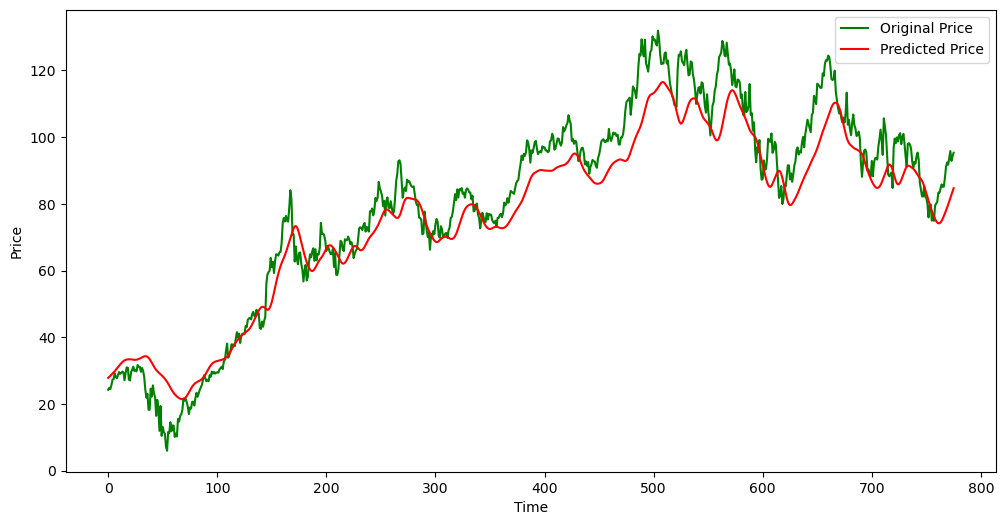

In [137]:
plt.figure(figsize= (12,6))
plt.plot(y_test, 'g', label= 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()